In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.pandas.set_option('display.max_columns',None)

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


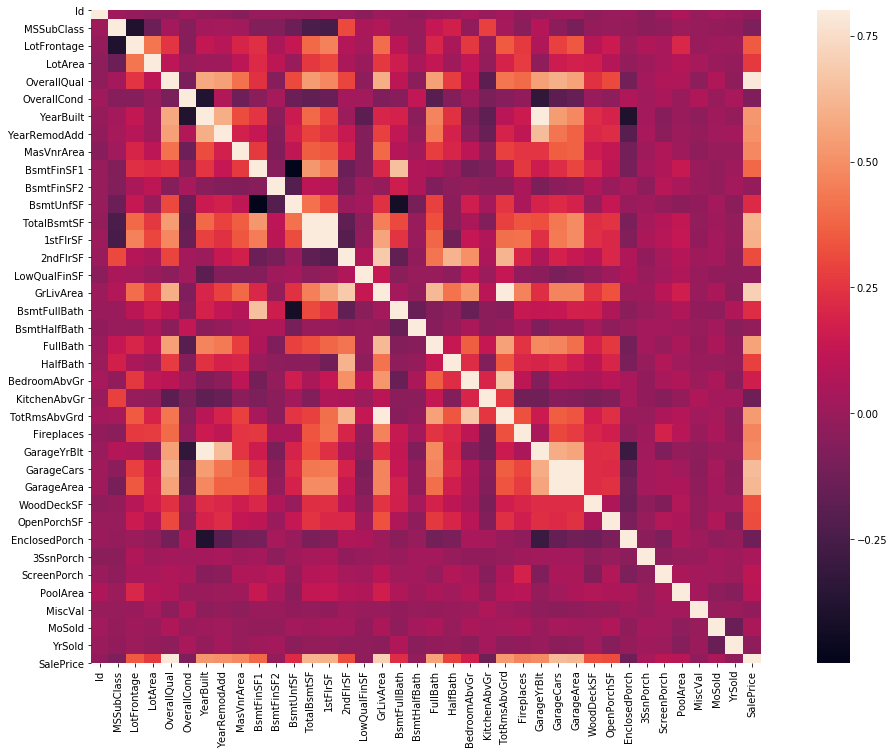

In [6]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

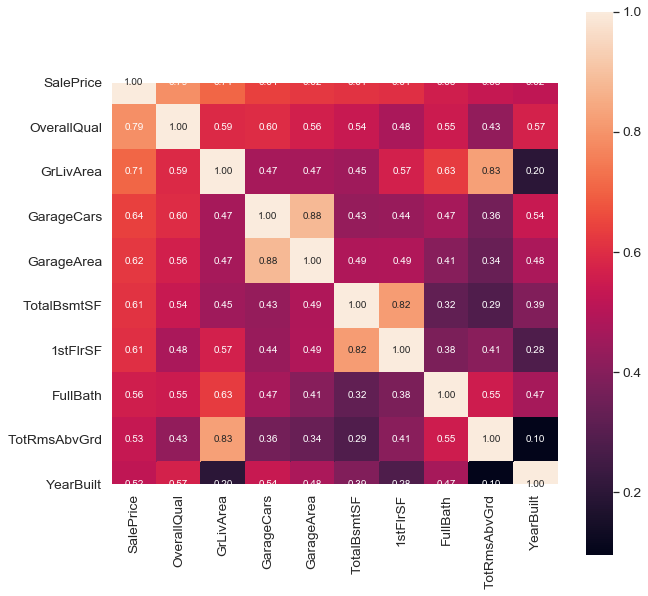

In [7]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [8]:
#below code is used to see which column is more correlated to dependent varibale so first ten columns are more correlated compare to other columns
corr = df_train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

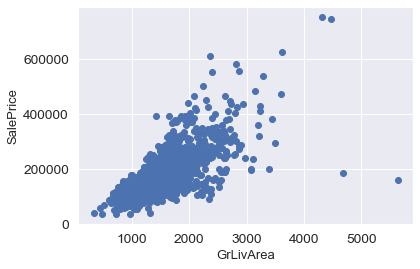

In [9]:
fig = plt.subplots()
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

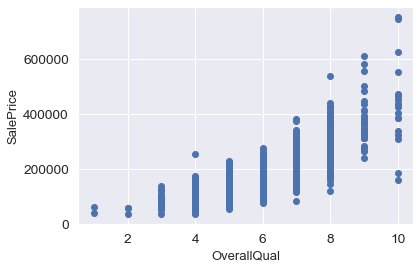

In [10]:
fig1= plt.subplots()
plt.scatter(x = df_train['OverallQual'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

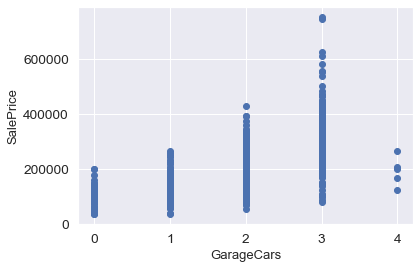

In [11]:
fig2= plt.subplots()
plt.scatter(x = df_train['GarageCars'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()

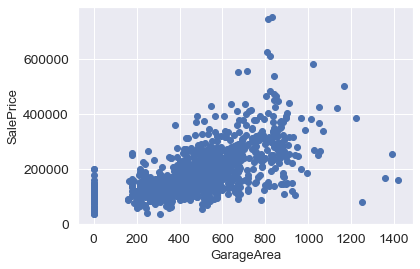

In [12]:
fig3= plt.subplots()
plt.scatter(x = df_train['GarageArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

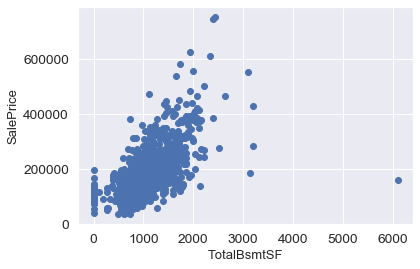

In [13]:
fig4= plt.subplots()
plt.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

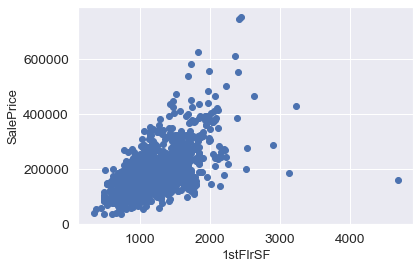

In [14]:
fig5= plt.subplots()
plt.scatter(x = df_train['1stFlrSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

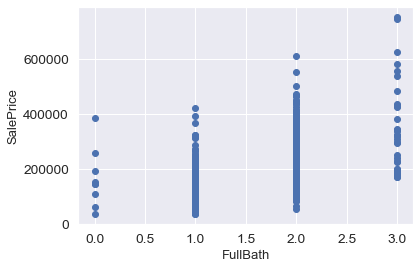

In [15]:
fig6= plt.subplots()
plt.scatter(x = df_train['FullBath'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('FullBath', fontsize=13)
plt.show()

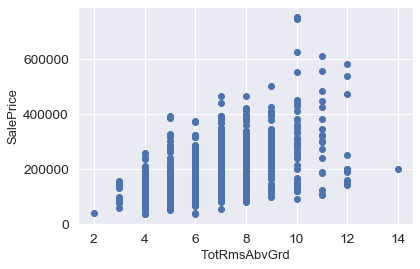

In [16]:
fig7= plt.subplots()
plt.scatter(x = df_train['TotRmsAbvGrd'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotRmsAbvGrd', fontsize=13)
plt.show()

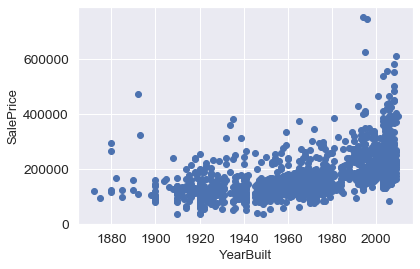

In [17]:
fig8= plt.subplots()
plt.scatter(x = df_train['YearBuilt'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


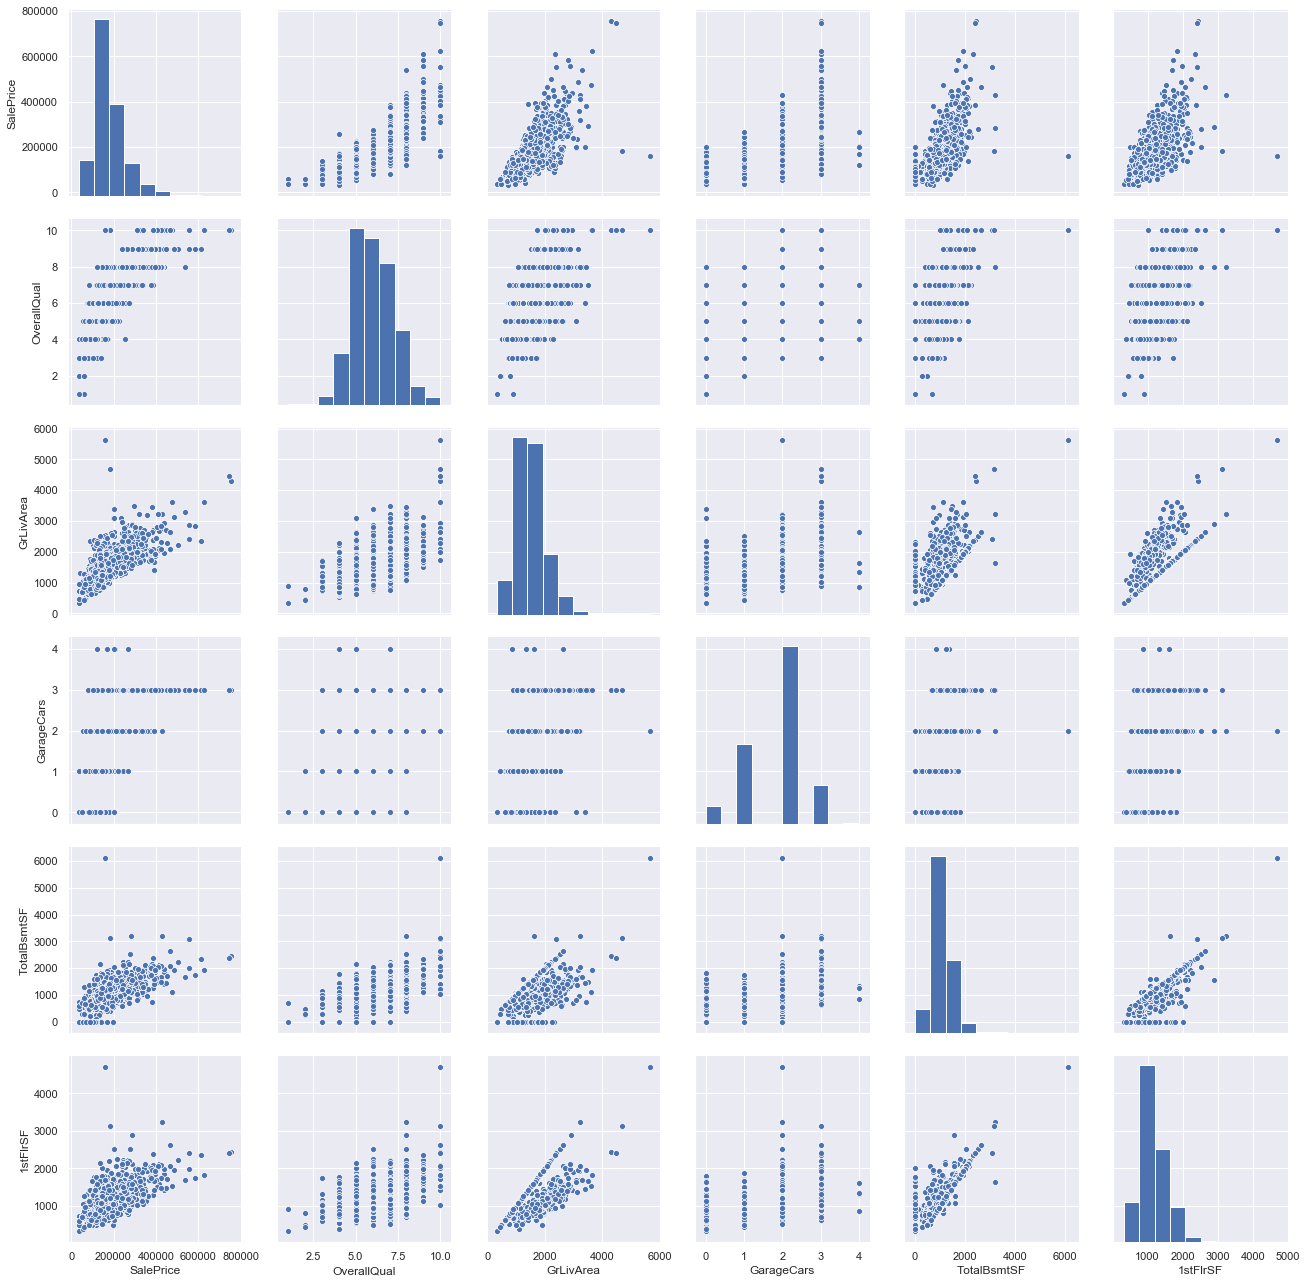

In [18]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(df_train[columns], size = 3)
plt.show();a

In [19]:
#feature engineering
df_train['TotalSF'] = df_train['TotalBsmtSF']+df_train['1stFlrSF']+df_train['2ndFlrSF']
df_train=df_train.drop(columns={'1stFlrSF', '2ndFlrSF','TotalBsmtSF'})
df_train['wholeExterior'] = df_train['Exterior1st']+df_train['Exterior2nd']
df_train=df_train.drop(columns={'Exterior1st','Exterior2nd'})
df_train['Bsmt'] = df_train['BsmtFinSF1']+ df_train['BsmtFinSF2']
df_train = df_train.drop(columns={'BsmtFinSF1','BsmtFinSF2'})
df_train['TotalBathroom'] = df_train['FullBath'] + df_train['HalfBath']
df_train = df_train.drop(columns={'FullBath','HalfBath'})


df_test['TotalSF'] = df_test['TotalBsmtSF']+df_test['1stFlrSF']+df_test['2ndFlrSF']
df_test=df_test.drop(columns={'1stFlrSF', '2ndFlrSF','TotalBsmtSF'})
df_test['wholeExterior'] = df_test['Exterior1st']+df_test['Exterior2nd']
df_test=df_test.drop(columns={'Exterior1st','Exterior2nd'})
df_test['Bsmt'] = df_test['BsmtFinSF1']+ df_test['BsmtFinSF2']
df_test = df_test.drop(columns={'BsmtFinSF1','BsmtFinSF2'})
df_test['TotalBathroom'] = df_test['FullBath'] + df_test['HalfBath']
df_test = df_test.drop(columns={'FullBath','HalfBath'})

In [21]:
frames = [df_train,df_test]
df = pd.concat(frames,keys=['train','test'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [22]:
df

3SsnPorch Alley  BedroomAbvGr BldgType    Bsmt BsmtCond  \
train 0             0   NaN             3     1Fam   706.0       TA   
      1             0   NaN             3     1Fam   978.0       TA   
      2             0   NaN             3     1Fam   486.0       TA   
      3             0   NaN             3     1Fam   216.0       Gd   
      4             0   NaN             4     1Fam   655.0       TA   
...               ...   ...           ...      ...     ...      ...   
test  1454          0   NaN             3    Twnhs     0.0       TA   
      1455          0   NaN             3   TwnhsE   252.0       TA   
      1456          0   NaN             4     1Fam  1224.0       TA   
      1457          0   NaN             3     1Fam   337.0       TA   
      1458          0   NaN             3     1Fam   758.0       TA   

           BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFullBath  BsmtHalfBath  \
train 0              No          GLQ          Unf           1.0           0.0   
      1              Gd          ALQ          Unf           0.0           1.0   
      2              Mn          GLQ          Unf           1.0           0.0   
      3              No          ALQ          Unf           1.0           0.0   
      4              Av          GLQ          Unf           1.0           0.0   
...                 ...          ...          ...           ...           ...   
test  1454           No          Unf          Unf           0.0           0.0   
      1455           No          Rec          Unf           0.0           0.0   
      1456           No          ALQ          Unf           1.0           0.0   
      1457           Av          GLQ          Unf           0.0           1.0   
      1458           Av          LwQ          Unf           0.0           0.0   

           BsmtQual  BsmtUnfSF CentralAir Condition1 Condition2 Electrical  \
train 0          Gd      150.0          Y       Norm       Norm      SBrkr   
      1          Gd      284.0          Y      Feedr       Norm      SBrkr   
      2          Gd      434.0          Y       Norm       Norm      SBrkr   
      3          TA      540.0          Y       Norm       Norm      SBrkr   
      4          Gd      490.0          Y       Norm       Norm      SBrkr   
...             ...        ...        ...        ...        ...        ...   
test  1454       TA      546.0          Y       Norm       Norm      SBrkr   
      1455       TA      294.0          Y       Norm       Norm      SBrkr   
      1456       TA        0.0          Y       Norm       Norm      SBrkr   
      1457       Gd      575.0          Y       Norm       Norm      SBrkr   
      1458       Gd      238.0          Y       Norm       Norm      SBrkr   

            EnclosedPorch ExterCond ExterQual  Fence FireplaceQu  Fireplaces  \
train 0                 0        TA        Gd    NaN         NaN           0   
      1                 0        TA        TA    NaN          TA           1   
      2                 0        TA        Gd    NaN          TA           1   
      3               272        TA        TA    NaN          Gd           1   
      4                 0        TA        Gd    NaN          TA           1   
...                   ...       ...       ...    ...         ...         ...   
test  1454              0        TA        TA    NaN         NaN           0   
      1455              0        TA        TA    NaN         NaN           0   
      1456              0        TA        TA    NaN          TA           1   
      1457              0        TA        TA  MnPrv         NaN           0   
      1458              0        TA        TA    NaN          TA           1   

           Foundation Functional  GarageArea  GarageCars GarageCond  \
train 0         PConc        Typ       548.0         2.0         TA   
      1        CBlock        Typ       460.0         2.0         TA   
      2         PConc        Typ       608.0         2.0         TA   
    

In [23]:
df_missing=df.isnull().sum().sort_values(ascending=False)
df_missing

PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
SalePrice      1459
               ... 
YrSold            0
Id                0
HouseStyle        0
HeatingQC         0
3SsnPorch         0
Length: 76, dtype: int64

In [24]:
cat_col = df.select_dtypes(include=['object'])
cat_col.isnull().sum()
cat_col.columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities', 'wholeExterior'],
      dtype='object')

In [25]:
num_col = df.select_dtypes(include=['int64', 'float64'])
num_col.isnull().sum()
num_col.columns

Index(['3SsnPorch', 'BedroomAbvGr', 'Bsmt', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBathroom', 'TotalSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [28]:
# handling missing values of numerical columns
#LotFrontage: all house have linear connected feet so putting most mean value
# df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].dropna().mean())
df['LotFrontage'] = df['LotFrontage'].fillna(value=0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(value=0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(value=0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(value=0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(value=0)
df['GarageArea'] = df['GarageArea'].fillna(value=0)
df['GarageCars'] = df['GarageCars'].fillna(value=0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(value=0)
df['Bsmt'] = df['Bsmt'].fillna(value=0)
df['TotalSF'] = df['TotalSF'].fillna(value=0)

In [29]:
# handling missing values of categorical columns
df['MSZoning'] = df['MSZoning'].fillna(value='None')
df['GarageQual'] = df['GarageQual'].fillna(value='None')
df['GarageCond'] = df['GarageCond'].fillna(value='None')
df['GarageFinish'] = df['GarageFinish'].fillna(value='None')
df['GarageType'] = df['GarageType'].fillna(value='None')
df['BsmtExposure'] = df['BsmtExposure'].fillna(value='None')
df['BsmtCond'] = df['BsmtCond'].fillna(value='None')
df['BsmtQual'] = df['BsmtQual'].fillna(value='None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(value='None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(value='None')
df['MasVnrType'] = df['MasVnrType'].fillna(value='None')
df['Utilities'] = df['Utilities'].fillna(value='None')
df['Functional'] = df['Functional'].fillna(value='None')
df['Electrical'] = df['Electrical'].fillna(value='None')
df['KitchenQual'] = df['KitchenQual'].fillna(value='None')
df['SaleType'] = df['SaleType'].fillna(value='None')
df['wholeExterior'] = df['wholeExterior'].fillna(value='None')

In [30]:
df = df.drop(columns={'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'})

In [31]:
df_main = pd.get_dummies(df)
df_main

3SsnPorch  BedroomAbvGr    Bsmt  BsmtFullBath  BsmtHalfBath  \
train 0             0             3   706.0           1.0           0.0   
      1             0             3   978.0           0.0           1.0   
      2             0             3   486.0           1.0           0.0   
      3             0             3   216.0           1.0           0.0   
      4             0             4   655.0           1.0           0.0   
...               ...           ...     ...           ...           ...   
test  1454          0             3     0.0           0.0           0.0   
      1455          0             3   252.0           0.0           0.0   
      1456          0             4  1224.0           1.0           0.0   
      1457          0             3   337.0           0.0           1.0   
      1458          0             3   758.0           0.0           0.0   

            BsmtUnfSF  EnclosedPorch  Fireplaces  GarageArea  GarageCars  \
train 0         150.0              0           0       548.0         2.0   
      1         284.0              0           1       460.0         2.0   
      2         434.0              0           1       608.0         2.0   
      3         540.0            272           1       642.0         3.0   
      4         490.0              0           1       836.0         3.0   
...               ...            ...         ...         ...         ...   
test  1454      546.0              0           0         0.0         0.0   
      1455      294.0              0           0       286.0         1.0   
      1456        0.0              0           1       576.0         2.0   
      1457      575.0              0           0         0.0         0.0   
      1458      238.0              0           1       650.0         3.0   

            GarageYrBlt  GrLivArea    Id  KitchenAbvGr  LotArea  LotFrontage  \
train 0          2003.0       1710     1             1     8450         65.0   
      1          1976.0       1262     2             1     9600         80.0   
      2          2001.0       1786     3             1    11250         68.0   
      3          1998.0       1717     4             1     9550         60.0   
      4          2000.0       2198     5             1    14260         84.0   
...                 ...        ...   ...           ...      ...          ...   
test  1454          0.0       1092  2915             1     1936         21.0   
      1455       1970.0       1092  2916             1     1894         21.0   
      1456       1960.0       1224  2917             1    20000        160.0   
      1457          0.0        970  2918             1    10441         62.0   
      1458       1993.0       2000  2919             1     9627         74.0   

            LowQualFinSF  MSSubClass  MasVnrArea  MiscVal  MoSold  \
train 0                0          60       196.0        0       2   
      1                0          20         0.0        0       5   
      2                0          60       162.0        0       9   
      3                0          70         0.0        0       2   
      4                0          60       350.0        0      12   
...                  ...         ...         ...      ...     ...   
test  1454             0         160         0.0        0       6   
      1455             0         160         0.0        0       4   
      1456             0          20         0.0        0       9   
      1457             0          85         0.0      700       7   
      1458             0          60        94.0        0      11   

            OpenPorchSF  OverallCond  OverallQual  PoolArea  SalePrice  \
train 0              61            5            7         0   208500.0   
      1               0            8            6         0   181500.0   
      2              42            5            7         0   223500.0   
      3              35            5            7         0   140000.0   
      4              84            5  

In [32]:
df_main.shape

(2919, 339)

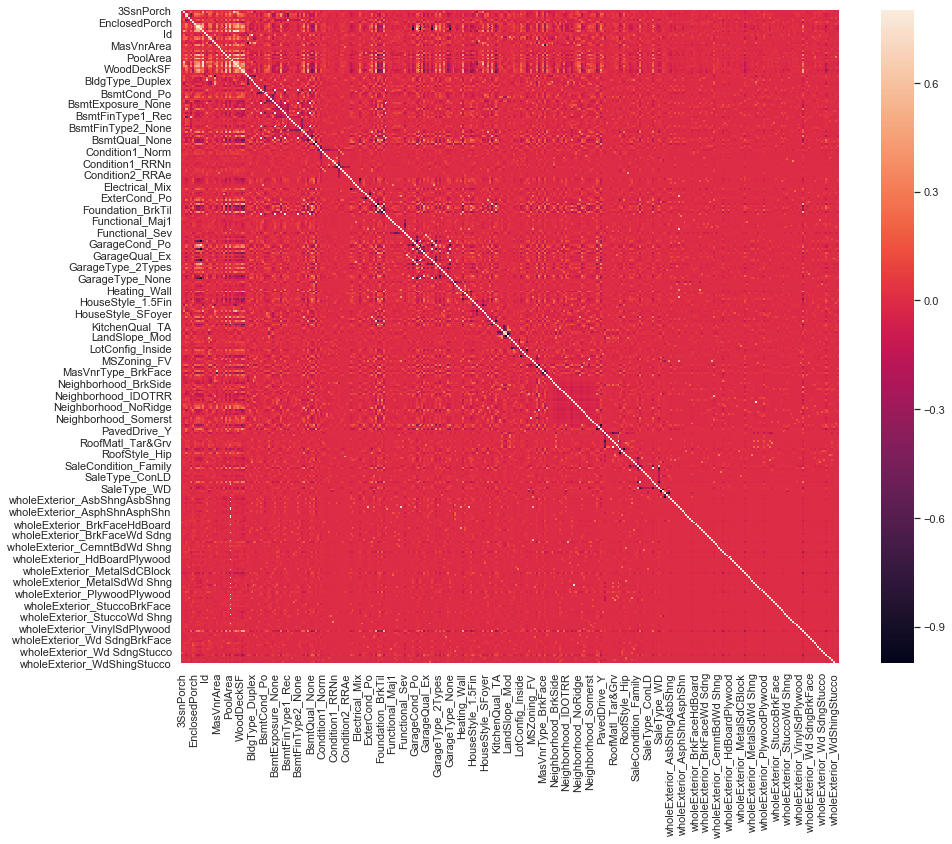

In [34]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df_main.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

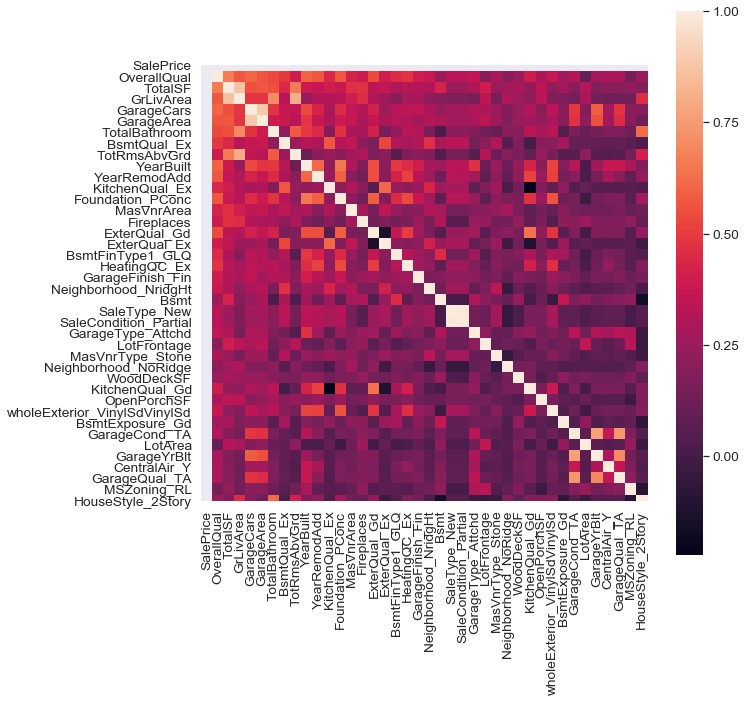

In [35]:
#saleprice correlation matrix
k = 40 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_main[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [36]:
EID = df_main.loc['test']
df_test = df_main.loc['test']
df_train = df_main.loc['train']
EID = EID.Id

In [37]:
df_test.drop(['SalePrice','Id'], axis =1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
X_train = df_train.drop(['SalePrice','Id'], axis = 1)
y_train = df_train['SalePrice']

In [39]:
import xgboost
xgboost = xgboost.XGBRegressor(learning_rate=0.05,
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      n_estimators=1000,
                      max_depth=5,
                      gamma=5)

xgboost.fit(X_train, y_train)
print(my_model.score(X_train_scaled,y_train))
y_pred = xgboost.predict(df_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:31:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
y_pred

array([120680.805, 167926.81 , 183430.47 , ..., 160959.92 , 114902.83 ,
       208293.3  ], dtype=float32)

In [41]:
#making main csv file Use the submission 4 file it improves the accuracy 0.12491
main_submission = pd.DataFrame({'Id': EID, 'SalePrice': y_pred})

main_submission.to_csv("submission_6.csv", index=False)
main_submission.head()

,Id,SalePrice
0,1461,120680.804688
1,1462,167926.812500
2,1463,183430.468750
3,1464,192114.203125
4,1465,181811.218750


In [42]:
## Hyperparameter Optimisation
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1000, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

In [43]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
# Set up the random search with 4-fold cross validation

random_cv = RandomizedSearchCV(estimator=xgboost,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [46]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   31.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  9.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 16.9min finished


[17:55:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.5, gamma=5,
                                          importance_type='gain',
                                          learning_rate=0.05, max_delta_step=0,
                                          max_depth=5, min_child_weight=1,
                                          missing=None, n_estimators=1000,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_al...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [47]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=5,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [60]:
import xgboost
xgboost = xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=5,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(df_test)

[21:49:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
#making main csv file Accuracy is 0.12524
main_submission = pd.DataFrame({'Id': EID, 'SalePrice': y_pred})

main_submission.to_csv("submission_5.csv", index=False) 
main_submission.head()

,Id,SalePrice
0,1461,124213.992188
1,1462,165238.515625
2,1463,183592.828125
3,1464,196041.796875
4,1465,183080.328125
